In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError
import math


In [2]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.15.0


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)


In [3]:
Normal_Data = pd.read_csv('./SWaT dataset/SWaT_Dataset_Normal_v0.csv')
Attack_Data = pd.read_csv('./SWaT dataset/SWaT_Dataset_Attack_v0.csv')

df = pd.concat([Normal_Data, Attack_Data])


In [4]:
print(df.shape)

(946719, 53)


In [5]:
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946719 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      946719 non-null  object 
 1   FIT101         946719 non-null  float64
 2   LIT101         946719 non-null  float64
 3   MV101          946719 non-null  int64  
 4   P101           946719 non-null  int64  
 5   P102           946719 non-null  int64  
 6   AIT201         946719 non-null  float64
 7   AIT202         946719 non-null  float64
 8   AIT203         946719 non-null  float64
 9   FIT201         946719 non-null  float64
 10  MV201          946719 non-null  int64  
 11  P201           946719 non-null  int64  
 12  P202           946719 non-null  int64  
 13  P203           946719 non-null  int64  
 14  P204           946719 non-null  int64  
 15  P205           946719 non-null  int64  
 16  P206           946719 non-null  int64  
 17  DPIT301        946719 non-null  fl

In [7]:
df['Normal/Attack'].unique()

array(['Normal', 'Attack', 'A ttack'], dtype=object)

In [8]:
df['Normal/Attack'] = df['Normal/Attack'].str.replace(' ', '')


In [9]:
print(df.head())
print("'Timestamp' in df.columns:", 'Timestamp' in df.columns)


                Timestamp    FIT101    LIT101  MV101  P101  P102    AIT201  \
0   22/12/2015 4:00:00 PM  2.470294  261.5804      2     2     1  244.3284   
1   22/12/2015 4:00:01 PM  2.457163  261.1879      2     2     1  244.3284   
2   22/12/2015 4:00:02 PM  2.439548  260.9131      2     2     1  244.3284   
3   22/12/2015 4:00:03 PM  2.428338  260.2850      2     2     1  244.3284   
4   22/12/2015 4:00:04 PM  2.424815  259.8925      2     2     1  244.4245   

    AIT202   AIT203    FIT201  ...  P501  P502    PIT501  PIT502    PIT503  \
0  8.19008  306.101  2.471278  ...     1     1  10.02948     0.0  4.277749   
1  8.19008  306.101  2.468587  ...     1     1  10.02948     0.0  4.277749   
2  8.19008  306.101  2.467305  ...     1     1  10.02948     0.0  4.277749   
3  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   
4  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   

     FIT601  P601  P602  P603  Normal/Attack  
0  0.000256    

In [10]:
if 'Timestamp' in df.columns:
    df['Timestamp'] = df['Timestamp'].str.strip()
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
    df = df.set_index('Timestamp')
else:
    print("'Timestamp' column not found.")


In [11]:
df.drop_duplicates(inplace=True)


In [12]:
df.head(-5)

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-02 14:59:50,2.633956,516.8018,2,2,1,168.0979,8.642528,301.8457,2.462051,2,...,2,1,251.37790,0.945119,189.118200,0.000000,1,1,1,Normal
2016-01-02 14:59:51,2.626909,516.9588,2,2,1,168.0979,8.642528,301.8457,2.460898,2,...,2,1,251.37790,0.945119,189.118200,0.000000,1,1,1,Normal
2016-01-02 14:59:52,2.616340,517.4691,2,2,1,168.0979,8.642528,301.9226,2.460770,2,...,2,1,251.37790,0.945119,189.118200,0.000000,1,1,1,Normal


In [13]:
df.dropna(inplace=True)

In [14]:
df.nunique()

FIT101            3953
LIT101           12162
MV101                3
P101                 2
P102                 2
AIT201            2338
AIT202            1763
AIT203            6868
FIT201            4989
MV201                3
P201                 2
P202                 1
P203                 2
P204                 2
P205                 2
P206                 2
DPIT301           5180
FIT301            8281
LIT301           11966
MV301                3
MV302                3
MV303                3
MV304                3
P301                 2
P302                 2
AIT401              37
AIT402            4127
FIT401             968
LIT401           15141
P401                 1
P402                 2
P403                 2
P404                 1
UV401                2
AIT501            1724
AIT502            3470
AIT503            1123
AIT504             565
FIT501            1027
FIT502            1560
FIT503             499
FIT504             289
P501                 2
P502       

In [15]:
df = df.loc[:, df.nunique() > 1]

In [16]:
df = df.dropna()

In [17]:
class_counts = df['Normal/Attack'].value_counts()
print(class_counts)


Normal/Attack
Normal    875250
Attack     53648
Name: count, dtype: int64


In [18]:
df['Normal/Attack'] = df['Normal/Attack'].apply(lambda x: 1 if x == 'Attack' else 0)
target_feature = df['Normal/Attack']
X = df.drop(columns=['Normal/Attack'])

In [19]:
cardinality_threshold = 8
num_features = [column for column in X.columns if X[column].nunique() > cardinality_threshold]
catg_features = [column for column in X.columns if X[column].nunique() <= cardinality_threshold]


In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[catg_features])
catg_features_names = encoder.get_feature_names_out(catg_features)
X_combined = pd.concat([pd.DataFrame(X_encoded, columns=catg_features_names), X[num_features].reset_index(drop=True)], axis=1) if num_features else pd.DataFrame(X_encoded, columns=catg_features_names)
X_train, X_test, target_train, target_test = train_test_split(X_combined, target_feature, test_size=0.2, random_state=42, stratify=target_feature)

scaler = StandardScaler()
if num_features:
    X_train[num_features] = scaler.fit_transform(X_train[num_features])
    X_test[num_features] = scaler.transform(X_test[num_features])
df_test= X_test
print("Training data shape:", X_train.shape)
print("Test data shape:", df_test.shape)


Training data shape: (743118, 51)
Test data shape: (185780, 51)


In [21]:
class_distribution = target_train.value_counts()
print("Class distribution in training data:\n", class_distribution)
class_distribution2 = target_test.value_counts()
print("Class distribution in training data:\n", class_distribution2)


Class distribution in training data:
 Normal/Attack
0    700200
1     42918
Name: count, dtype: int64
Class distribution in training data:
 Normal/Attack
0    175050
1     10730
Name: count, dtype: int64


In [22]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
sampling_strategy = {0: 280000, 1: 42918}
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
df_train, target_train = undersampler.fit_resample(X_train, target_train)
print(pd.Series(target_train).value_counts())

print('Resampled training set shape:', df_train.shape)
print('Resampled class distribution:', pd.Series(target_train).value_counts())


Normal/Attack
0    280000
1     42918
Name: count, dtype: int64
Resampled training set shape: (322918, 51)
Resampled class distribution: Normal/Attack
0    280000
1     42918
Name: count, dtype: int64


In [23]:
X_train_reshaped1 = np.reshape(df_train, (df_train.shape[0], 1, df_train.shape[1]))
X_test_reshaped1 = np.reshape(df_test, (df_test.shape[0], 1, df_test.shape[1]))


In [24]:
results = {}
sequence_length = X_train_reshaped1.shape[1]
nb_features = X_train_reshaped1.shape[2]
for num_cells in [30, 40, 50]:
    for dropout_rate in [0, 0.01]:
        for learning_rate in [ 1e-3, 1e-2]:
            print(f'Running with {num_cells} LSTM cells, dropout = {dropout_rate}, and learning rate = {learning_rate}...')
            
            model = Sequential([
                LSTM(units=num_cells, return_sequences=True, input_shape=(sequence_length, nb_features)),
                Dropout(dropout_rate),
                LSTM(units=num_cells, return_sequences=False),
                Dropout(dropout_rate),
                Dense(units=1, activation='relu')
            ])  
            optimiser = RMSprop(learning_rate=learning_rate)
            model.compile(loss="mse", optimizer=optimiser, metrics=['mse', 'mae'])
            history = model.fit(X_train_reshaped1, target_train, epochs=15, batch_size=200, validation_data=(X_test_reshaped1, target_test), verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

            num_epochs = len(history.history['val_loss'])
            best_epoch = num_epochs - 10
            train_mse = history.history['loss'][best_epoch]
            val_mse = history.history['val_loss'][best_epoch]
            train_mae = history.history['mae'][best_epoch]
            val_mae = history.history['val_mae'][best_epoch]
            train_rmse = math.sqrt(train_mse)
            val_rmse = math.sqrt(val_mse)
            results[(num_cells, dropout_rate, learning_rate, best_epoch)] = {'train_mse': train_mse, 'val_mse': val_mse, 'train_mae': train_mae, 'val_mae': val_mae, 'train_rmse': train_rmse, 'val_rmse': val_rmse}           
            print(f'Train MSE = {train_mse}, Validation MSE = {val_mse}, Train MAE = {train_mae}, Validation MAE = {val_mae}, Train RMSE = {train_rmse}, Validation RMSE = {val_rmse}')


Running with 30 LSTM cells, dropout = 0, and learning rate = 0.001...

Epoch 1/15


1615/1615 [==============================] - 19s 8ms/step - loss: 0.0227 - mse: 0.0227 - mae: 0.0440 - val_loss: 0.0086 - val_mse: 0.0086 - val_mae: 0.0201
Epoch 2/15
1615/1615 [==============================] - 12s 8ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0255 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0269
Epoch 3/15
1615/1615 [==============================] - 10s 6ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0228 - val_loss: 0.0059 - val_mse: 0.0059 - val_mae: 0.0105
Epoch 4/15
1615/1615 [==============================] - 10s 6ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0211 - val_loss: 0.0057 - val_mse: 0.0057 - val_mae: 0.0091
Epoch 5/15
1615/1615 [==============================] - 10s 6ms/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0200 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0109
Epoch 6/15
1615/1615 [==============================] - 10s 6ms/step - loss: 0.0118 - mse: 0

In [25]:
val_results = {key: results[key]['val_mse'] for key in results.keys()}
num_cells, dropout_rate, learning_rate, num_epochs = min(val_results, key=val_results.get)
print(f'Best parameters: {num_cells} LSTM cells, training for {num_epochs} epochs with dropout = {dropout_rate} and learning rate = {learning_rate}')

model = Sequential([
    LSTM(units=num_cells, return_sequences=True, input_shape=(sequence_length, nb_features)),
    Dropout(dropout_rate),
    LSTM(units=num_cells, return_sequences=False),
    Dropout(dropout_rate),
    Dense(units=1, activation='relu')
])


Best parameters: 30 LSTM cells, training for 5 epochs with dropout = 0 and learning rate = 0.01


In [26]:
optimiser = RMSprop(learning_rate=learning_rate)
model.compile(loss="mse", optimizer=optimiser, metrics=['mse', 'mae'])
hist = model.fit(X_train_reshaped1, target_train, epochs=10, batch_size=200, validation_data=(X_test_reshaped1, target_test), verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])




Epoch 1/10
1615/1615 [==============================] - 17s 7ms/step - loss: 0.0177 - mse: 0.0177 - mae: 0.0268 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0090
Epoch 2/10
1615/1615 [==============================] - 9s 6ms/step - loss: 0.0137 - mse: 0.0137 - mae: 0.0186 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0090
Epoch 3/10
1615/1615 [==============================] - 9s 6ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0174 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0076
Epoch 4/10
1615/1615 [==============================] - 9s 6ms/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0167 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0094
Epoch 5/10
1615/1615 [==============================] - 9s 6ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0164 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0071
Epoch 6/10
1615/1615 [==============================] - 9s 6ms/step - loss: 0.0123 - mse: 0.0123 - mae: 0.0158 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0067
Epo

In [27]:
scores_test = model.evaluate(X_test_reshaped1, target_test, verbose=2)
rmse_test = math.sqrt(scores_test[1])
print(f'MSE: {scores_test[1]}, MAE: {scores_test[2]}, RMSE: {rmse_test}')


5806/5806 - 11s - loss: 0.0054 - mse: 0.0054 - mae: 0.0062 - 11s/epoch - 2ms/step
MSE: 0.005362235475331545, MAE: 0.006198440212756395, RMSE: 0.07322728641245382


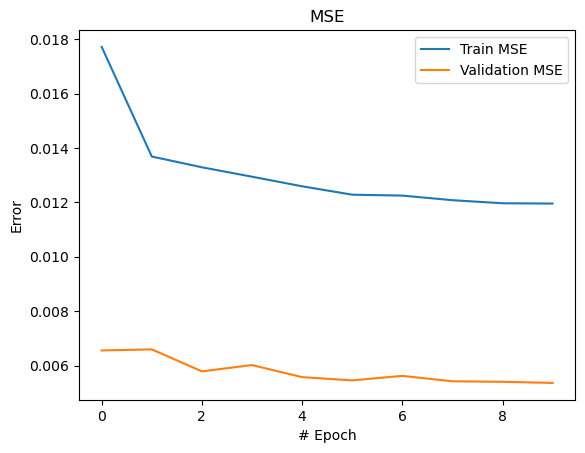

In [28]:
plt.figure()
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('MSE')
plt.ylabel('Error')
plt.xlabel('# Epoch')
plt.legend(['Train MSE', 'Validation MSE'], loc='upper right')
plt.show()


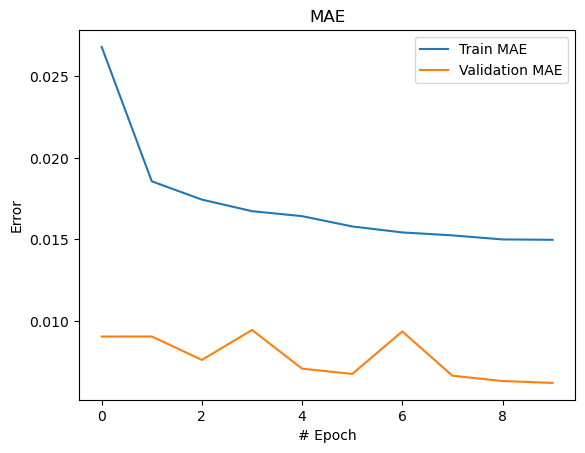

In [29]:
plt.figure()
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('MAE')
plt.ylabel('Error')
plt.xlabel('# Epoch')
plt.legend([ 'Train MAE', 'Validation MAE'], loc='upper right')
plt.show()


In [31]:
y_pred_test = model.predict(X_test_reshaped1)
y_pred_binary = (y_pred_test > 0.99).astype(int)
accuracy = accuracy_score(target_test, y_pred_binary)
precision = precision_score(target_test, y_pred_binary)
recall = recall_score(target_test, y_pred_binary)
f1 = f1_score(target_test, y_pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


5806/5806 [==============================] - 10s 2ms/step
Accuracy: 0.9883
Precision: 1.0000
Recall: 0.7982
F1 Score: 0.8878
